## Gradient Descent
#### Gavin Daves, Rice University
#### INDE 577, Dr. Randy Davila

In this notebook, we will implement gradien descent in Python and then use it on the Spotify dataset.

In [25]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
import sys
from sklearn.model_selection import train_test_split

sns.set_theme()
from sklearn.metrics import mean_squared_error

In [71]:
def gradient_descent(X, y, alpha=0.05, epochs=10):
    """
    Performs the gradient descent algorithm.
    Inputs:
    - X: the feature matrix
    - y: the target values
    - alpha: the learning rate
    - epochs: the maximum number of iterations
    
    Returns:
    - w: the best-fit weights
    - mse: the mean squared error of the best-fit line
    - mse_values: the mean squared error at each iteration
    """
    
    mse_values = []
    
    # Initialize the weights
    w = np.random.rand(X.shape[1] + 1)
    n = len(X) 
    
    for _ in range(epochs):
        mse_values.append(mean_squared_error(y, np.dot(X, w[:-1]) + w[-1]))
        
        # Compute the predictions
        y_pred = np.dot(X, w[:-1]) + w[-1]
        
        # Compute derivatives
        
        for xi, yi, y_predi in zip(X, y, y_pred):
            error = yi - y_predi
            dw = -2/n * error * xi
            db = -2/n * error
            
        
        # Update the weights
        w[:-1] -= alpha * dw
        w[-1] -= alpha * db

        if np.linalg.norm(dw) < 1e-3:
            break
    
    mse = mean_squared_error(y, y_pred)
        
    return w, mse, mse_values
    

To use gradient descent, we will investigate Loudness vs. Energy in The Beatles songs.

Text(0.5, 1.0, 'Loudness vs Energy in Beatles Songs')

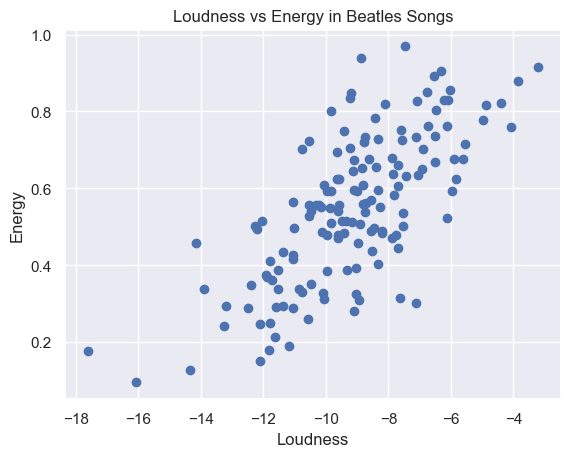

In [27]:
# Loading the data

# Add the top-level directory to the system path
sys.path.append('../../')

# Load the data
import clean_data as sd

df = sd.get_df()

# Make a subset of the data that only contains The Beatles
beatles = df[df['artists'] == 'The Beatles']

In [ ]:
# Plot the loudness and energy of The Beatles songs
plt.plot(beatles['loudness'], beatles['energy'], 'o')
plt.xlabel('Loudness')
plt.ylabel('Energy')
plt.title('Loudness vs Energy in Beatles Songs')

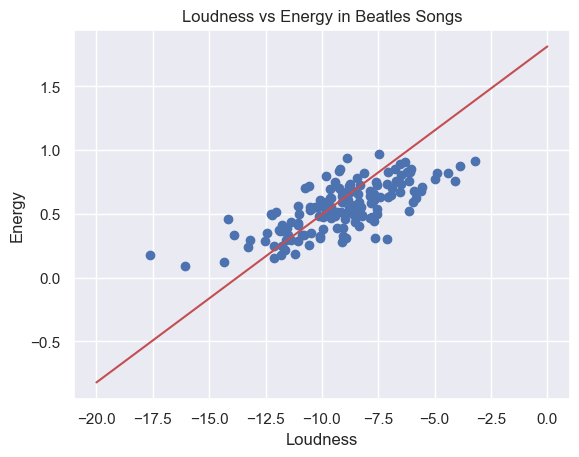

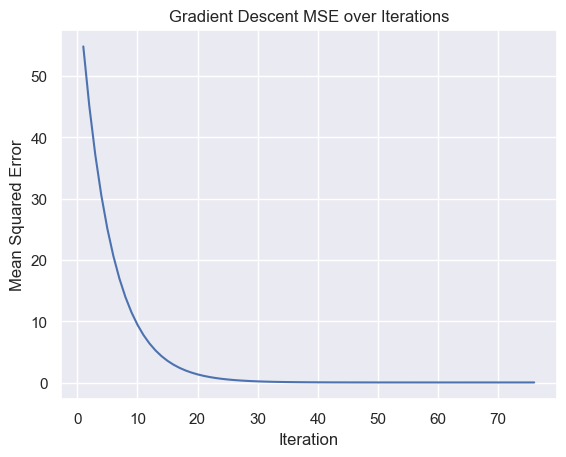

In [77]:
# Using gradient descent to fit a line to the data
X = beatles['loudness'].values.reshape(-1, 1)
y = beatles['energy'].values

X = np.hstack([X, np.ones((len(X), 1))])

w, mse, mse_values = gradient_descent(X, y, alpha=0.05, epochs=100)

# Plot the data
plt.plot(beatles['loudness'], beatles['energy'], 'o')
plt.xlabel('Loudness')
plt.ylabel('Energy')
plt.title('Loudness vs Energy in Beatles Songs')

# Plot the best-fit line
x = np.linspace(-20, 0, 100)
y_pred = w[0] * x + w[1] + w[2]
plt.plot(x, y_pred, color='r')
plt.show()

# Plot the mean squared error over iterations to see if the algorithm is converging
iter_vector = np.arange(1, len(mse_values) +1)
plt.plot(iter_vector, mse_values)
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Gradient Descent MSE over Iterations')
plt.show()